In [34]:
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt



df = pd.read_csv('data-sell4all.csv')

print(df.head())

      Pays  Age    Genre Dépenses des clients
0   France    32  Female               150.50
1  Germany    45    Male               200.75
2    Spain    28  Female                75.25
3    Italy    39    Male               180.00
4       UK    52  Female               250.30


In [35]:
print(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 65 entries, 0 to 64
Data columns (total 4 columns):
 #   Column                Non-Null Count  Dtype 
---  ------                --------------  ----- 
 0   Pays                  65 non-null     object
 1    Age                  63 non-null     object
 2   Genre                 64 non-null     object
 3   Dépenses des clients  64 non-null     object
dtypes: object(4)
memory usage: 2.2+ KB
None


### Résumé Technique

- Le dataset contient 65 lignes et 4 colonnes.
- Certaines colonnes ont des valeurs manquantes.
- Une conversion de type de données est nécessaire pour une analyse correcte.
- Les colonnes **Âge** et **Dépenses des clients** doivent être numériques.

In [36]:
df.columns = df.columns.str.strip()

df['Age'] = pd.to_numeric(df['Age'], errors='coerce')
df['Dépenses des clients'] = pd.to_numeric(df['Dépenses des clients'], errors='coerce')

médiane_âge = df['Age'].median()
moyenne_âge = df['Age'].mean()
médiane_dépenses = df['Dépenses des clients'].median()
moyenne_dépenses = df['Dépenses des clients'].mean()

print(f"Médiane de l'Âge: {médiane_âge}")
print(f"Moyenne de l'Âge: {moyenne_âge}")
print(f"Médiane des Dépenses des clients: {médiane_dépenses}")
print(f"Moyenne des Dépenses des clients: {moyenne_dépenses}")

Médiane de l'Âge: 36.0
Moyenne de l'Âge: 52.42372881355932
Médiane des Dépenses des clients: 167.5
Moyenne des Dépenses des clients: 34811.72948275862


In [37]:
df_cleaned = df[df['Dépenses des clients'] >= 10]
df_cleaned = df_cleaned.drop_duplicates()
df_cleaned = df_cleaned.iloc[:-3]
df_cleaned[['Pays', 'Age', 'Genre', 'Dépenses des clients']].to_csv('cleaned_data-sell4all.csv', index=False)

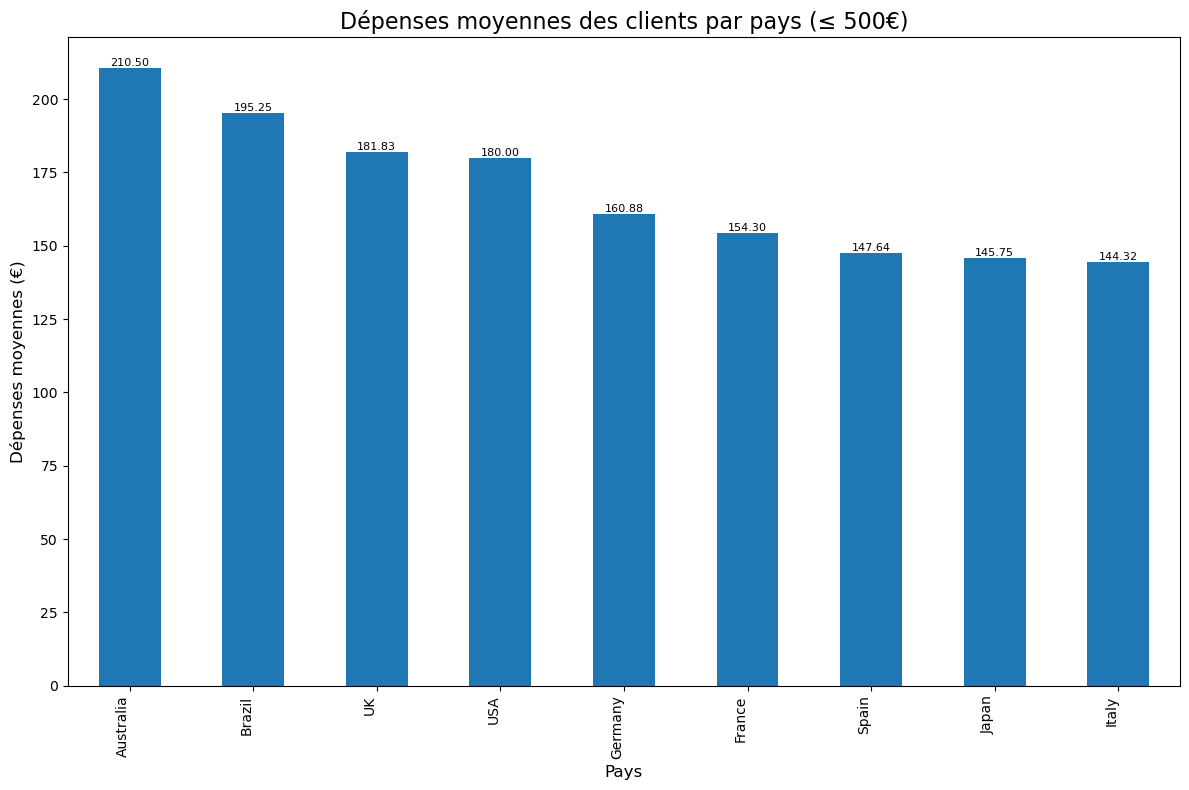

In [38]:
df_cleaned = pd.read_csv('cleaned_data-sell4all.csv')
df_filtered = df_cleaned[df_cleaned['Dépenses des clients'] <= 500.00]

country_spending = df_filtered.groupby('Pays')['Dépenses des clients'].mean().sort_values(ascending=False)

plt.figure(figsize=(12, 8))
bars = country_spending.plot(kind='bar')
plt.title('Dépenses moyennes des clients par pays (≤ 500€)', fontsize=16)
plt.xlabel('Pays', fontsize=12)
plt.ylabel('Dépenses moyennes (€)', fontsize=12)
plt.xticks(rotation=90, ha='right', fontsize=10)
plt.yticks(fontsize=10)

for i, v in enumerate(country_spending):
    plt.text(i, v, f'{v:.2f}', ha='center', va='bottom', fontsize=8)

plt.subplots_adjust(bottom=0.2)

plt.tight_layout()

plt.show()
